<a href="https://colab.research.google.com/github/Fabio-Morganti/Progetto-Python-Data-Science/blob/main/Progetto_Python_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

     |████████████████████████████████| 972kB 8.5MB/s 
     |████████████████████████████████| 6.5MB 15.3MB/s 
     |████████████████████████████████| 14.8MB 296kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Progetto Python/dataset_balanced.csv')
df.head()

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Source,Severity,Start_Time,Street,Side,City,County,State,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C),Durations,Start_Date,Orario,Year,Month,Day,Day_of_week,Season
0,39.063148,-84.032608,100.0,29.67,10.0,3.5,MapQuest,2,06:49:27,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
1,39.627781,-84.188354,89.0,29.65,6.0,3.5,MapQuest,2,07:39:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
2,39.758274,-84.230507,100.0,29.66,7.0,3.5,MapQuest,2,07:59:35,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
3,39.952812,-83.119293,93.0,29.64,5.0,5.8,MapQuest,3,08:14:42,Outerbelt S,R,Columbus,Franklin,OH,US/Eastern,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.6,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
4,39.790760,-84.241547,89.0,29.65,10.0,5.8,MapQuest,2,08:37:07,Salem Ave,L,Dayton,Montgomery,OH,US/Eastern,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno


In [ ]:
df_float = df.select_dtypes(include='float64')
df_float.dtypes

Start_Lat          float64
Start_Lng          float64
Humidity(%)        float64
Pressure(in)       float64
Visibility(mi)     float64
Wind_Speed(mph)    float64
Temperature(C)     float64
Durations          float64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.



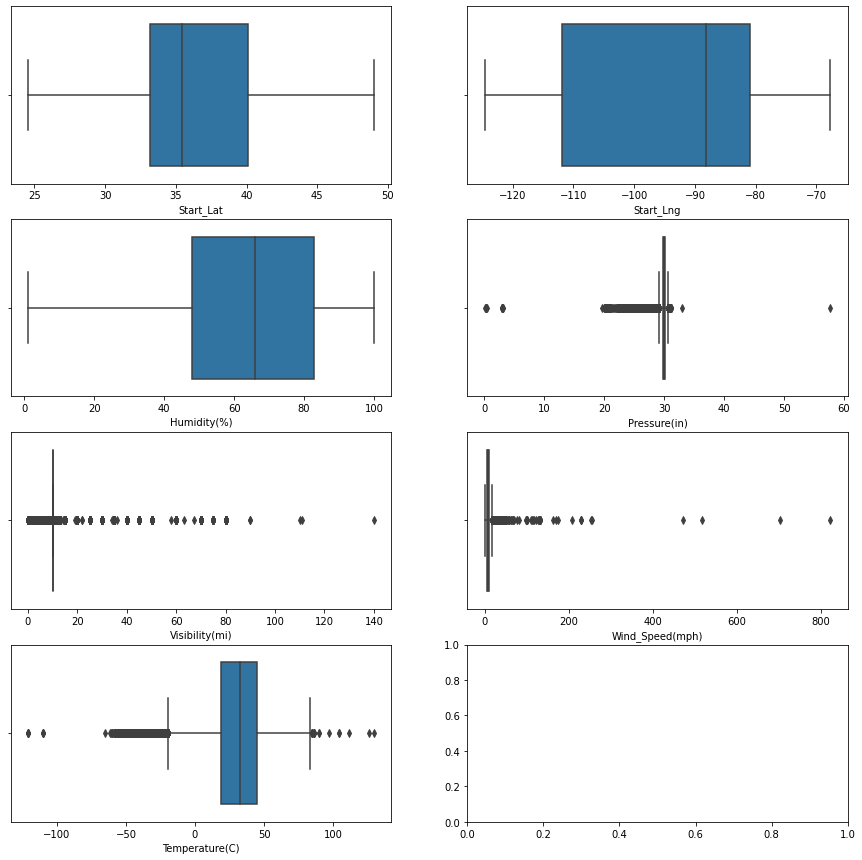

In [ ]:
f, axes = plt.subplots(4, 2)
f.set_figheight(15)
f.set_figwidth(15)
sns.boxplot(x= "Start_Lat", data=df_float,  orient='v' , ax=axes[0][0])
sns.boxplot(x= "Start_Lng", data=df_float,  orient='v' , ax=axes[0][1])
sns.boxplot(x= "Humidity(%)", data=df_float,  orient='v' , ax=axes[1][0])
sns.boxplot(x= "Pressure(in)", data=df_float,  orient='v' , ax=axes[1][1])
sns.boxplot(x= "Visibility(mi)", data=df_float,  orient='v' , ax=axes[2][0])
sns.boxplot(x= "Wind_Speed(mph)", data=df_float,  orient='v' , ax=axes[2][1])
sns.boxplot(x= "Temperature(C)", data=df_float,  orient='v' , ax=axes[3][0])
plt.savefig('/content/drive/MyDrive/Progetto Python/boxplot.png')

In [ ]:
df.shape

(1247246, 43)

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Start_Lng'], df['Start_Lat']))

In [ ]:
gdf.head()

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Source,Severity,Start_Time,Street,Side,City,County,State,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C),Durations,Start_Date,Orario,Year,Month,Day,Day_of_week,Season,geometry
0,39.063148,-84.032608,100.0,29.67,10.0,3.5,MapQuest,2,06:49:27,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno,POINT (-84.03261 39.06315)
1,39.627781,-84.188354,89.0,29.65,6.0,3.5,MapQuest,2,07:39:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno,POINT (-84.18835 39.62778)
2,39.758274,-84.230507,100.0,29.66,7.0,3.5,MapQuest,2,07:59:35,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno,POINT (-84.23051 39.75827)
3,39.952812,-83.119293,93.0,29.64,5.0,5.8,MapQuest,3,08:14:42,Outerbelt S,R,Columbus,Franklin,OH,US/Eastern,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.6,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno,POINT (-83.11929 39.95281)
4,39.790760,-84.241547,89.0,29.65,10.0,5.8,MapQuest,2,08:37:07,Salem Ave,L,Dayton,Montgomery,OH,US/Eastern,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno,POINT (-84.24155 39.79076)


In [ ]:
df_weekend = df[df['Day_of_week'] == 'Sabato' ]

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_weekend['Start_Lng'],
        lat = df_weekend['Start_Lat'],
        ))

fig.update_layout(
        title = 'Incidenti avvenuti di Sabato',
        geo_scope='usa',
    )
fig.show()

In [ ]:
grouped = df.groupby('State')

In [ ]:
df_stati = pd.DataFrame()
df_stati['State'] = grouped.indices

In [ ]:
df_stati['Cnt'] = grouped['Severity'].count()

In [ ]:
df_stati.head()

,State,Cnt
AL,AL,16465
AR,AR,452
AZ,AZ,42514
CA,CA,228499
CO,CO,19884


In [ ]:
fig = px.choropleth(locations=df_stati['State'], locationmode="USA-states", color=df_stati['Cnt'], scope="usa")
fig.show()

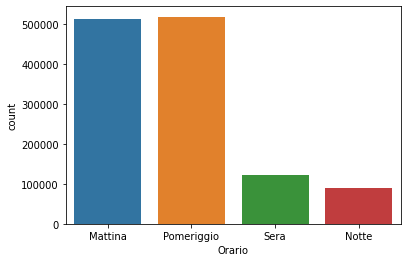

In [ ]:
sns.countplot(x="Orario", data=df)
plt.savefig('/content/drive/MyDrive/Progetto Python/Orario.png')
plt.show()

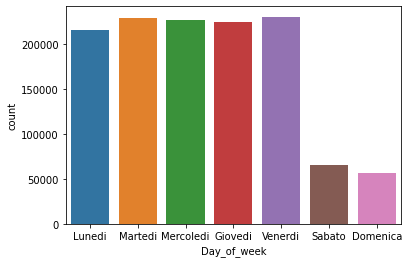

In [ ]:
sns.countplot(x="Day_of_week", data=df)
plt.savefig('/content/drive/MyDrive/Progetto Python/Giorno settimana.png')
plt.show()

In [ ]:
grouped = df.groupby('Severity')
df_sev = pd.DataFrame()
df_sev['Severity']= grouped.indices
df_sev['Cnt'] = grouped['State'].count()
df_sev.head()

,Severity,Cnt
1,1,16003
2,2,934744
3,3,263635
4,4,32864


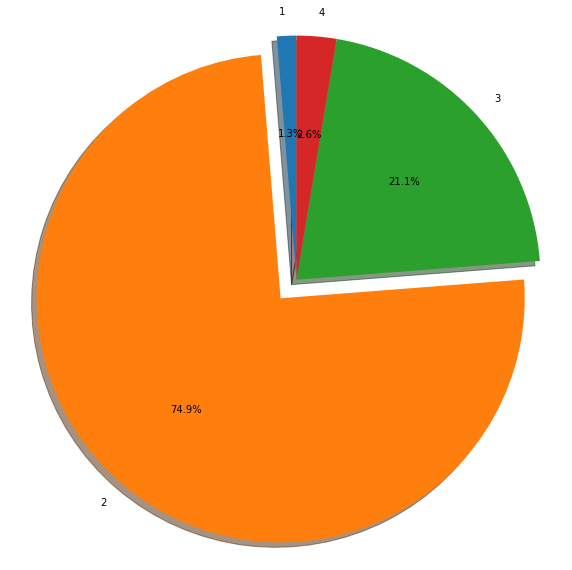

In [ ]:
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(df_sev['Cnt'].values, explode=explode, labels=df_sev['Severity'].values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('/content/drive/MyDrive/Progetto Python/Severity.png')
plt.show()

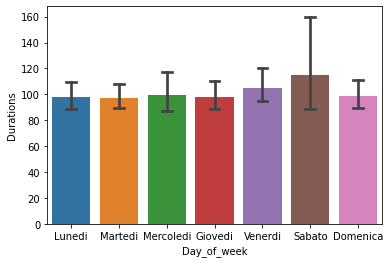

In [ ]:
sns.barplot(x="Day_of_week", y="Durations", data=df,  capsize=.2)
plt.savefig('/content/drive/MyDrive/Progetto Python/Durations.png')

In [ ]:
grouped = df.groupby('Year')
df_anno = pd.DataFrame()
df_anno['Year']= grouped.indices
df_anno['Cnt'] = grouped['State'].count()
df_anno['Year'] = df_anno['Year'].apply(lambda x:(str(x)))
df_anno.head(100)

,Year,Cnt
2016,2016,142965
2017,2017,257639
2018,2018,317358
2019,2019,329101
2020,2020,200183


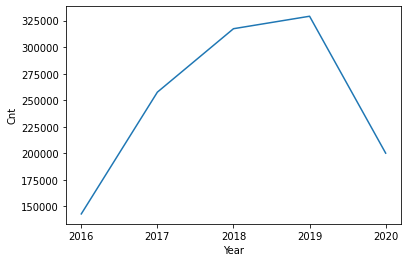

In [ ]:
sns.lineplot(data=df_anno, x="Year", y="Cnt")
plt.savefig('/content/drive/MyDrive/Progetto Python/Anno.png')